# Notebook Imports and Packages

In [88]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

from sympy import symbols, diff

%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x +1$$

In [89]:
def f(x):
    return x**2 + x + 1

In [90]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=10)
x_1

array([-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ])

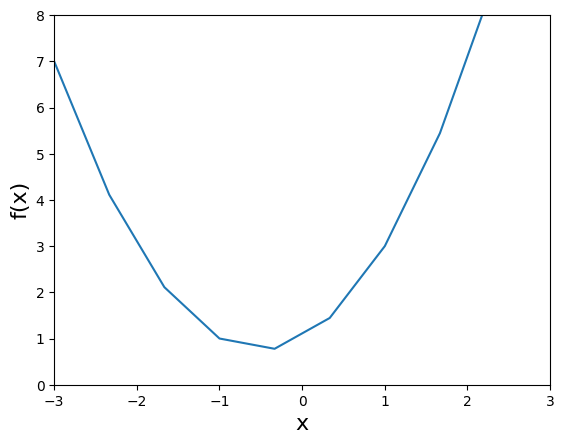

In [91]:
# Make Graph
plt.xlim([-3, 3])
plt.ylim([0, 8])
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

# Slope & Derivatives

In [92]:
def df(x):
    return 2*x + 1

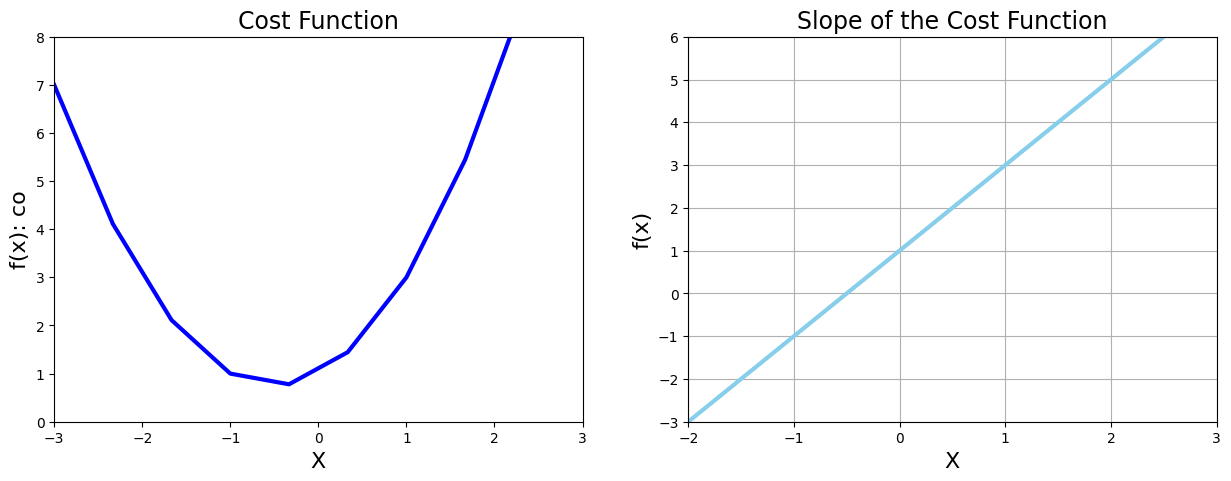

In [93]:
# Plot Function and derivative side by side
plt.figure(figsize=(15, 5))

# Chart 1: Cost Function
plt.subplot(1, 2, 1)

plt.xlim([-3, 3])
plt.ylim([0, 8])

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x): co', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# Chart 2: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='Skyblue', linewidth=3)


plt.show()

# Python Loops & Gradient Descent

In [94]:
# Python For Loop
for n in range(5):
  print('Hello World', n + 1)
print('Done')

Hello World 1
Hello World 2
Hello World 3
Hello World 4
Hello World 5
Done


In [95]:
# Python While Loop
counter = 0
while counter < 7:
  print('Counting ...', counter + 1)
  counter += 1
print('Done')

Counting ... 1
Counting ... 2
Counting ... 3
Counting ... 4
Counting ... 5
Counting ... 6
Counting ... 7
Done


In [96]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1 # Learning Rate
precision = 0.

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
  previous_x = new_x
  gradient = df(previous_x)
  new_x = previous_x - step_multiplier * gradient

  step_size = abs(new_x - previous_x)

  x_list.append(new_x)
  slope_list.append(df(new_x))

  if step_size < precision:
    print('Loop ran this many times:', n)
    break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Local minimum occurs at: -0.4999999999999999
Slope or df(x) value at this point is: 2.220446049250313e-16
f(x) value or cost at this point is: 0.75


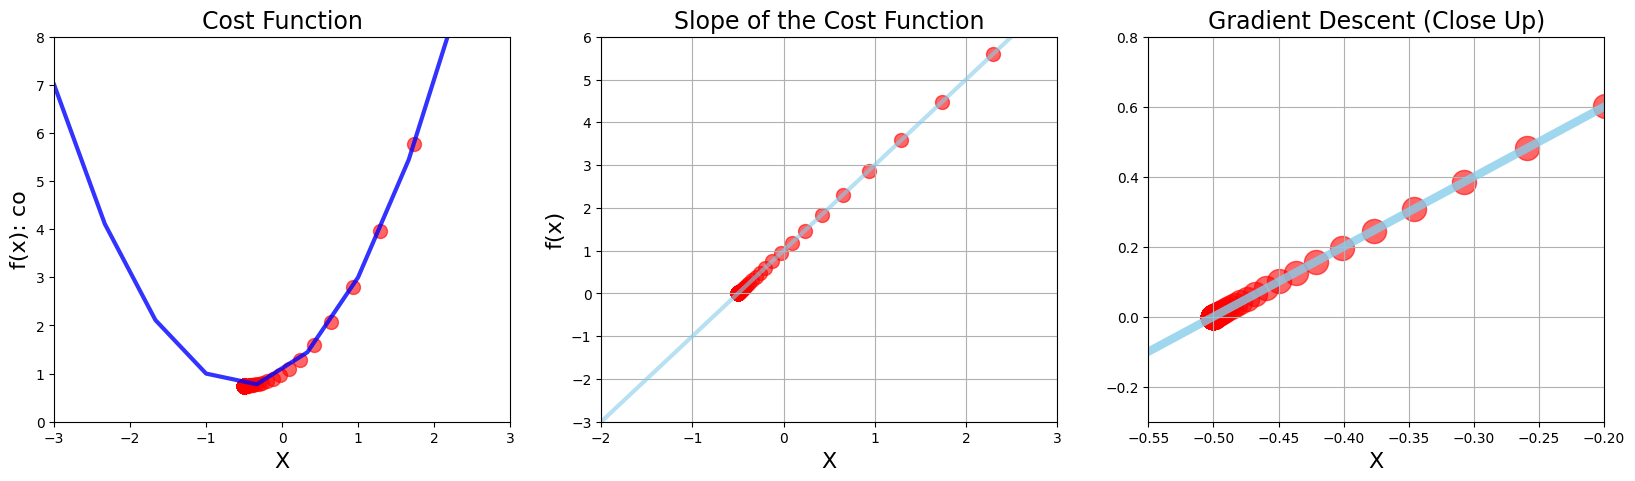

In [97]:
# Superimpose the gradient descent calculations on plot
plt.figure(figsize=(20, 5))

# Chart 1: Cost Function
plt.subplot(1, 3, 1)

plt.xlim([-3, 3])
plt.ylim([0, 8])

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x): co', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# Chart 2: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='Skyblue', linewidth=3, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.6)

# Chart 3: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (Close Up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='Skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)

plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 +5$$

In [98]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)


def g(x):
  return x**4 - 4*x**2 + 5

def dg(x):
  return 4*x**3 - 8*x

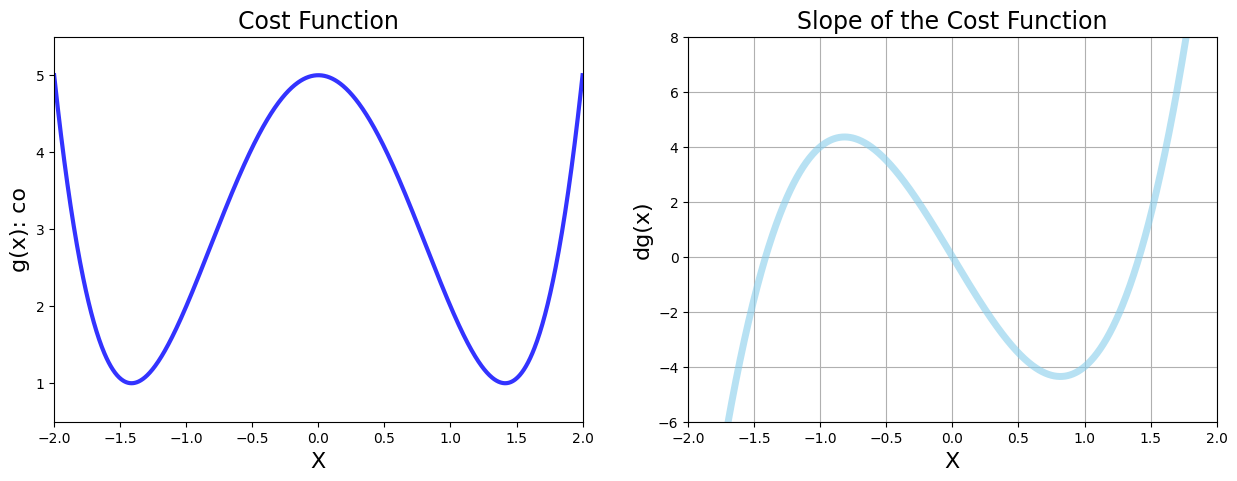

In [99]:
# Superimpose the gradient descent calculations on plot
plt.figure(figsize=(15, 5))

# Chart 1: Cost Function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x): co', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)

# Chart 2: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='Skyblue', linewidth=5, alpha=0.6)

plt.show()

# Gradient Descent as a Python Function

In [100]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                     max_iter=300):
  new_x = initial_guess
  x_list = [new_x]
  slope_list = [derivative_func(new_x)]

  for n in range(max_iter):
    previous_x = new_x
    gradient = derivative_func(previous_x)
    new_x = previous_x - multiplier * gradient

    step_size = abs(new_x - previous_x)

    x_list.append(new_x)
    slope_list.append(derivative_func(new_x))

    if step_size < precision:
      break
  return new_x, x_list, slope_list

In [101]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local minimum occurs at:', local_min)
print('Number of steps:', len(list_x))

Local minimum occurs at: -1.4137636556157256
Number of steps: 56


In [102]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print('Local minimum occurs at:', local_min)
print('Number of steps:', len(list_x))

Local minimum occurs at: -1.4120887490901561
Number of steps: 34


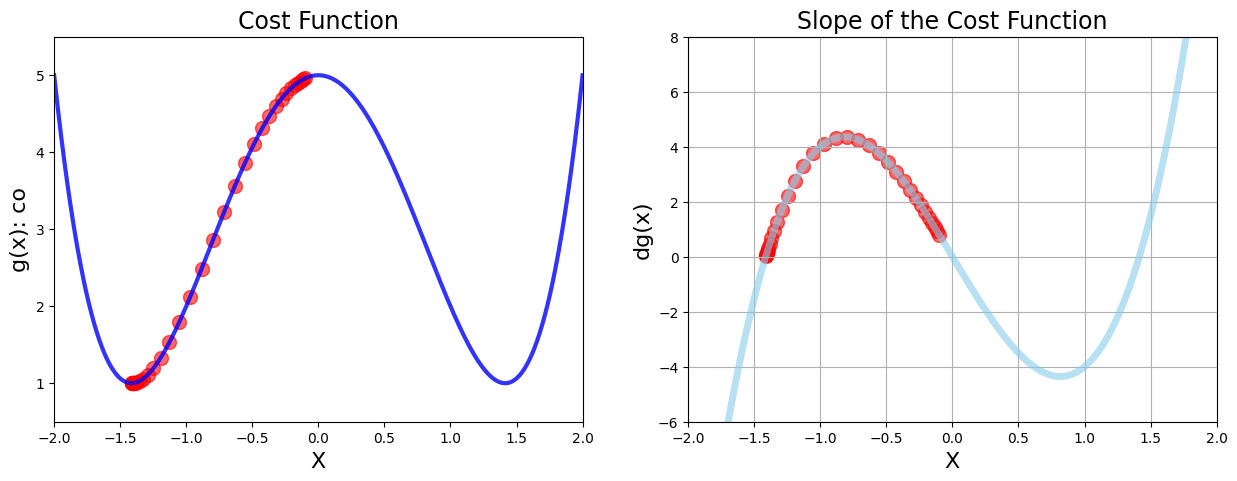

In [103]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)


# Plot function and derivative and scatter plot side by side
plt.figure(figsize=(15, 5))

# Chart 1: Cost Function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x): co', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# Chart 2: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='Skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)

plt.show()

#Example 3 - Divergence, Overflow and Python Tuples
## $$h(x) = x^5 - 2x^4 + 2$$

In [104]:
# Make Data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
  return x**5 - 2*x**4 + 2

def dh(x):
  return 5*x**4 - 8*x**3

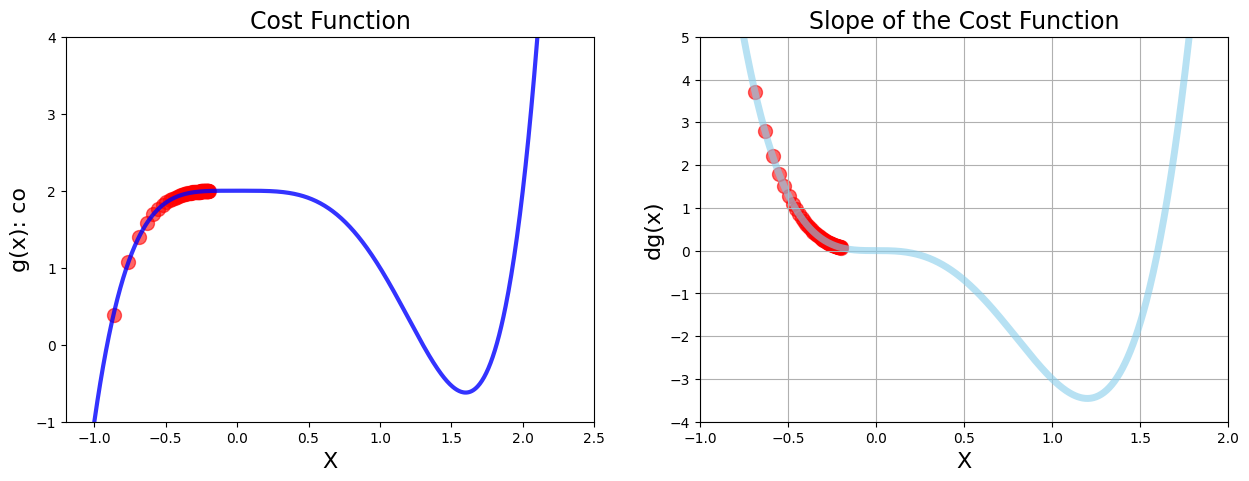

Local minimum occurs at: -1.8398461123332792e+24
Cost at this minimum is: -2.1081790694225687e+121
Number of steps: 72


In [105]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2,
                                                 max_iter=71)


# Plot function and derivative and scatter plot side by side
plt.figure(figsize=(15, 5))

# Chart 1: Cost Function
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x): co', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# Chart 2: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color='Skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)

plt.show()
print('Local minimum occurs at:', local_min)
print('Cost at this minimum is:', h(local_min))
print('Number of steps:', len(list_x))

In [106]:
import sys
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [107]:
# Creating a tuple - tuple packing
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17

print('I love ', breakfast[0])
print('My hotel has no ' + str(unlucky_numbers[1]) + 'th floor')

not_my_address = 1, 'Infinite Loop', 'Cupertino', 95014

tuple_with_single_value = 42,
type(tuple_with_single_value)

main, side, greens = breakfast
print('Main course is ', main)

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is', data_tuple[0])
print('Cost at this minimum is:', h(data_tuple[0]))
print('Number of steps:', len(data_tuple[1]))

I love  bacon
My hotel has no 4th floor
Main course is  bacon
Local min is 1.5989534547394717
Cost at this minimum is: -0.6214287992331258
Number of steps: 117


# Learning Rate


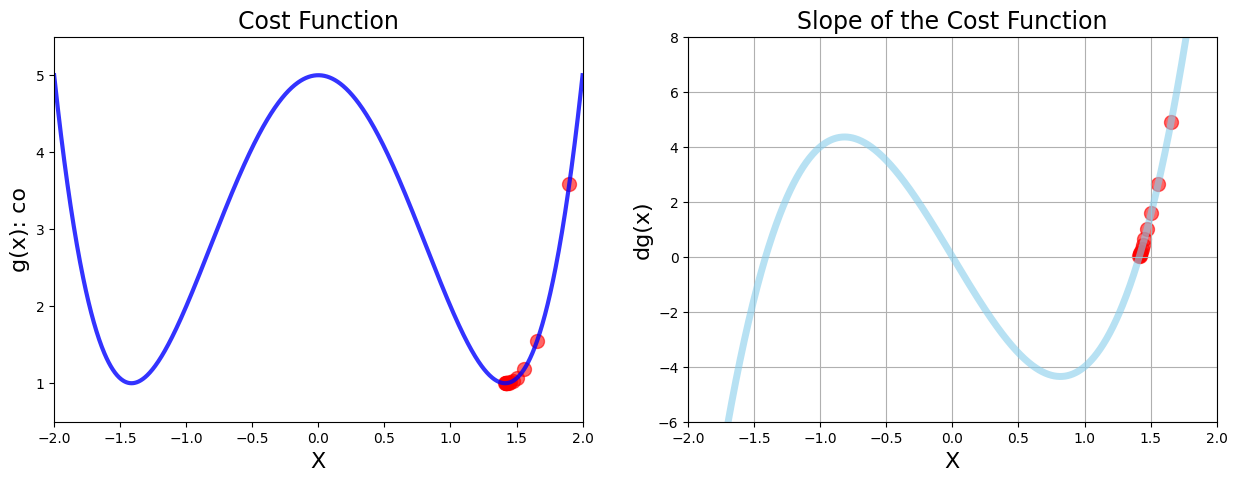

Number of steps is:  14


In [108]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.02)


# Plot function and derivative and scatter plot side by side
plt.figure(figsize=(15, 5))

# Chart 1: Cost Function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x): co', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# Chart 2: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='Skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)

plt.show()

print('Number of steps is: ', len(list_x))

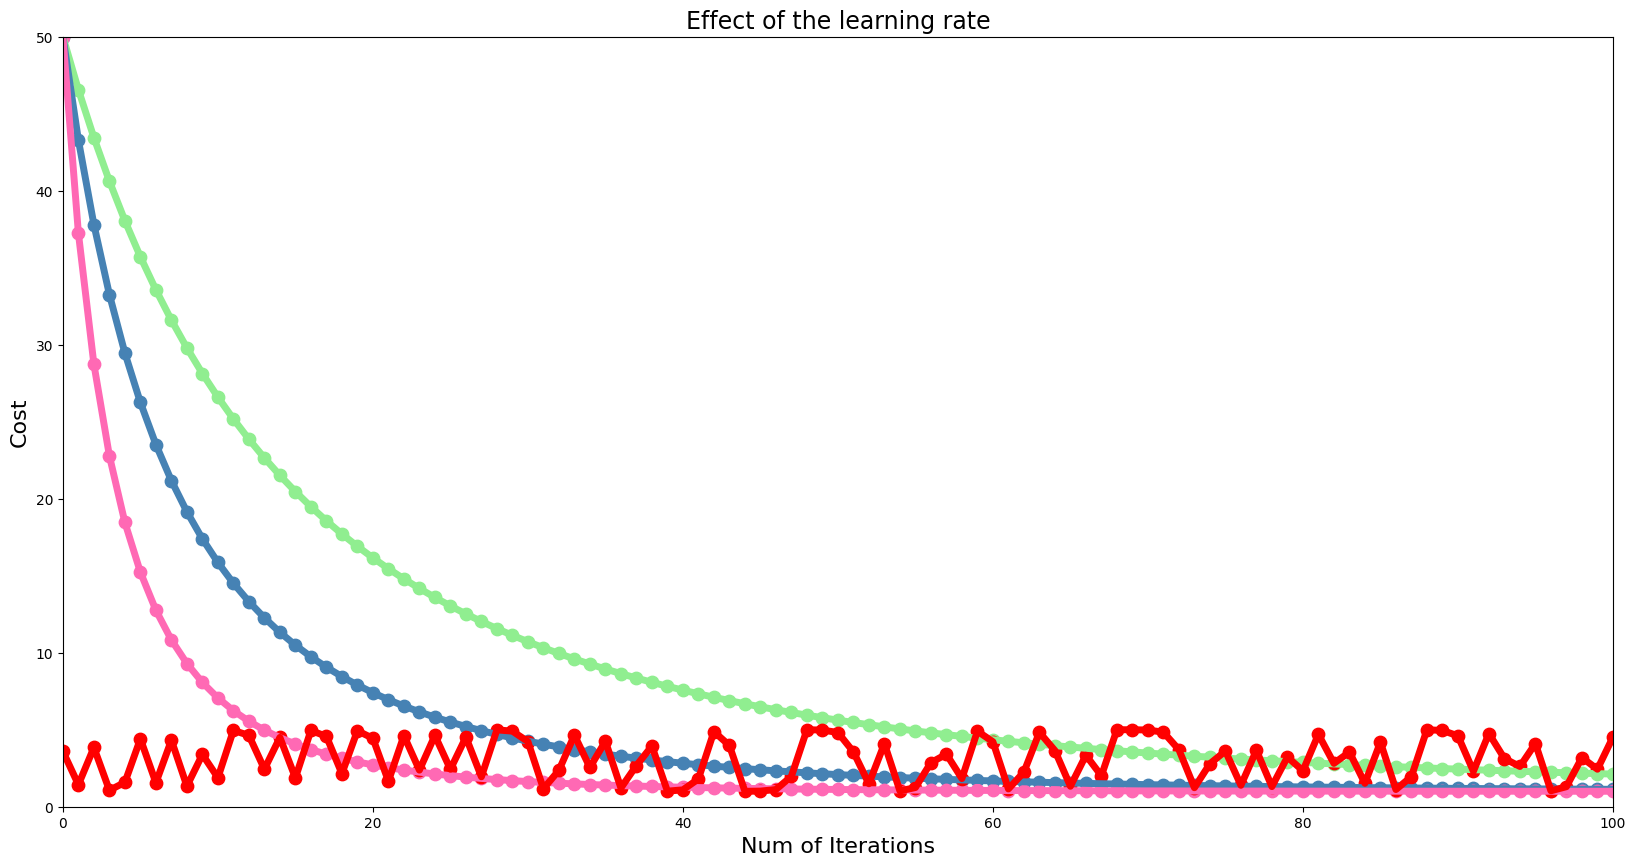

In [109]:
# Run Gradient Descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005,
                                                 precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001,
                                                 precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002,
                                                 precision=0.0001, max_iter=n)

# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25,
                                                 precision=0.0001, max_iter=n)

# Plotting reduction in cost for each iteration
plt.figure(figsize=(20, 10))

# Chart 1: Cost Function
plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Num of Iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts
# 1) Y Axis Data: Convert the lists to numpy arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])

# 2) X Axis Data: Create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting low learing rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

# Plotting mid learing rate
plt.plot(iteration_list, g(mid_values), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(mid_values), color='steelblue', s=80)

# Plotting high learing rate
plt.plot(iteration_list, g(high_values), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(high_values), color='hotpink', s=80)

# Plotting insane learing rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red', s=80)

plt.show()

# Example 4 - Data Viz with 3D Charts
## Minimize $$f(x,y) = \frac {1}{3^{-x^2-y^2}+1}$$

In [110]:
def f(x, y):
  r = 3**(-x**2 - y**2)
  return 1 / (r + 1)

In [111]:
x_4 = np.linspace(start= -2, stop=2, num=200)
y_4 = np.linspace(start= -2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)

print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


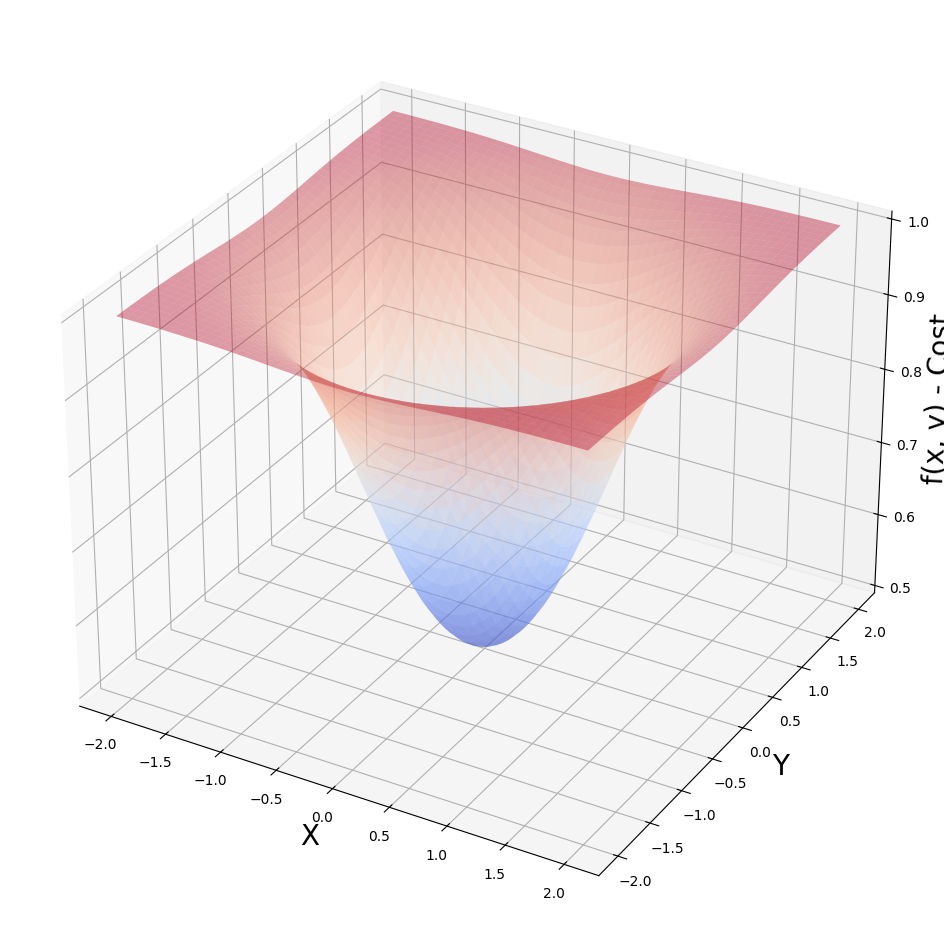

In [112]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

## Partial Derivatives & Symbolix Computation

In [118]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))

print('Partial derivative with respect to x: ', diff(f(a, b), a))

print('Value of f(x,y) at x=1.8 y=1.0 is:',
      f(a, b).evalf(subs={a: 1.8, b: 1.0})) # Python Dictionary


print('Value of partial derivative wrt x:',
      diff(f(a,b), a).evalf(subs={a: 1.8, b: 1.0}))


Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative with respect to x:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is: 0.990604794032582
Value of partial derivative wrt x: 0.0368089716197505


## Batch Gradient Descent with SymPy


In [126]:
# Setup
multiplier = 0.1
max_iter = 700

params = np.array([1.8, 1.0]) # Initial Guess

for n in range(max_iter):
  gradient_x = diff(f(a, b), a).evalf(subs={a: params[0], b: params[1]})
  gradient_y = diff(f(a, b), b).evalf(subs={a: params[0], b: params[1]})
  gradients = np.array([gradient_x, gradient_y])
  params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Mininum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))





Values in gradient array [2.48864649775875e-16 1.38258138764375e-16]
Mininum occurs at x value of:  4.28166267715915e-16
Minimum occurs at y value of:  2.37870148731064e-16
The cost is:  0.500000000000000
